In [7]:
import numpy as np
from six.moves import cPickle as pickle
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys


In [2]:
pickle_file = 'SVHN.pickle'

with open(pickle_file, 'rb') as f:
    
    test_labels = save['test_labels']
    valid_labels = save['valid_labels']
    save = pickle.load(f)
    train_labels = save['train_labels']
    
    del save

In [3]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size is', statinfo.st_size, 'bytes or', round(float(statinfo.st_size)/1073741824,2), 'GBs')

Compressed pickle size is 1031316145 bytes or 0.96 GBs


In [4]:
from collections import Counter

train_num_length = Counter(train_labels[:,0])
test_num_length = Counter(test_labels[:,0])
valid_num_length = Counter(valid_labels[:,0])

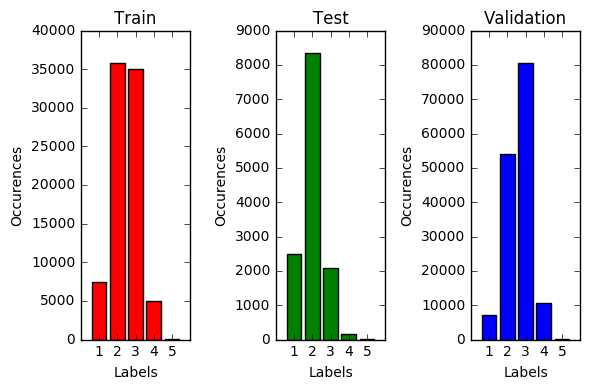

In [5]:
import matplotlib.pyplot as plt

plt.figure(1)

plt.subplot(131)
plt.bar(train_num_length.keys(), train_num_length.values(), align='center', color='r')
plt.xticks(train_num_length.keys())
plt.title('Train')
plt.xlabel('Labels')
plt.ylabel('Occurences')

plt.subplot(132)
plt.bar(test_num_length.keys(), test_num_length.values(), align='center', color='g')
plt.xticks(test_num_length.keys())
plt.title('Test')
plt.xlabel('Labels')
plt.ylabel('Occurences')

plt.subplot(133)
plt.bar(valid_num_length.keys(), valid_num_length.values(), align='center', color='b')
plt.xticks(valid_num_length.keys())
plt.title('Validation')
plt.xlabel('Labels')
plt.ylabel('Occurences')

plt.tight_layout()

plt.show()

In [8]:
from collections import Counter

# Remove classes of empty labels
train_digits = Counter(train_labels.flatten()[np.where(train_labels.flatten() != 10)])
test_digits = Counter(test_labels.flatten()[np.where(test_labels.flatten() != 10)])
valid_digits = Counter(valid_labels.flatten()[np.where(valid_labels.flatten() != 10)])

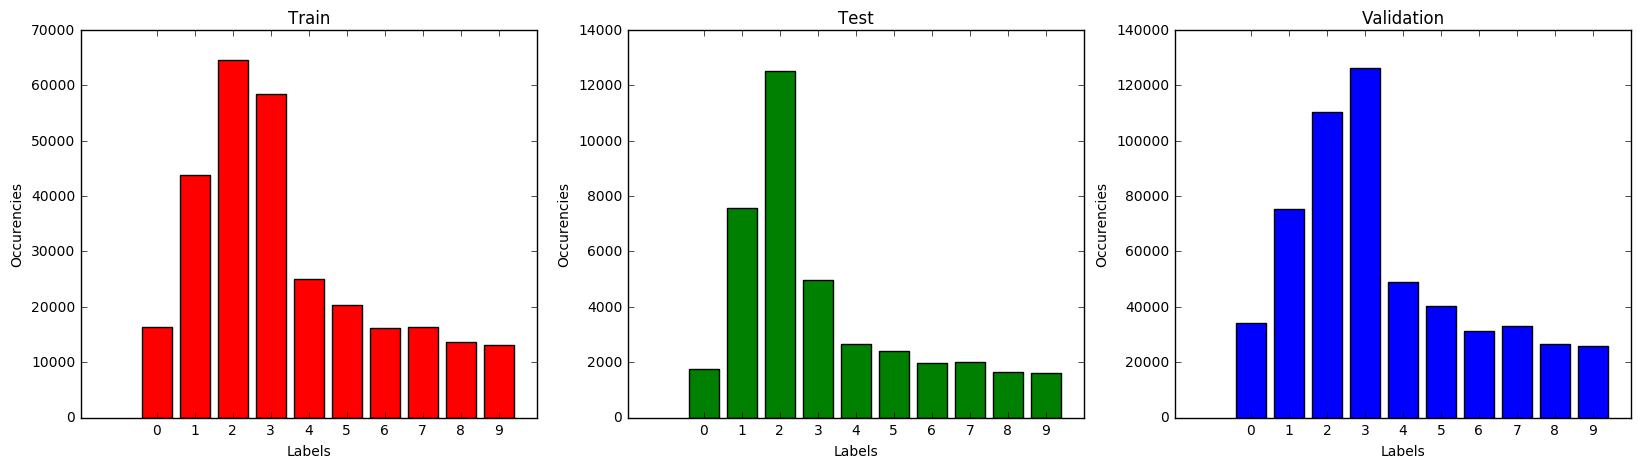

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

f, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(20, 5))

axis1.bar(train_digits.keys(), train_digits.values(), align='center', color='r')
axis1.set_xticks(train_digits.keys())
axis1.set_title('Training')
axis1.set_xlabel('Data Label')
axis1.set_ylabel('Data Occurence')

axis2.bar(test_digits.keys(), test_digits.values(), align='center', color='g')
axis2.set_xticks(test_digits.keys())
axis2.set_title('Testing')
axis2.set_xlabel('Data Labels')
axis2.set_ylabel('Data Occurence')

axis3.bar(valid_digits.keys(), valid_digits.values(), align='center', color='b')
axis3.set_xticks(valid_digits.keys())
axis3.set_title('Data Validation')
axis3.set_xlabel('Data Labels')
axis3.set_ylabel('Data Occurence')

plt.show()